In [1]:
import dmitry_yanakov_v1 as code
import numpy as np
from scipy.stats import binom, poisson
import matplotlib.pyplot as plt
import time
%matplotlib inline
%config InlineBackend.figure_formats = ['svg']

import warnings
warnings.filterwarnings('ignore')

In [2]:
params = {'amin': 75, 'amax': 90, 'bmin': 500, 'bmax': 600,
          'p1': 0.1, 'p2': 0.01, 'p3': 0.3}

In [3]:
amin = params['amin']
amax = params['amax']
bmin = params['bmin']
bmax = params['bmax']

p1 = params['p1']
p2 = params['p2']
p3 = params['p3']

# 2

In [4]:
Ea = (amin + amax) / 2
Eb = (bmin + bmax) / 2

Ec = p1 * Ea + p2 * Eb
Ed = (1 + p3) * Ec

In [5]:
Da = ((amax - amin + 1) ** 2 - 1) / 12
Db = ((bmax - bmin + 1) ** 2 - 1)/ 12

Dc_1 = p1 * (1 - p1) * Ea + p2 * (1 - p2) * Eb + p1 ** 2 * Da + p2 ** 2 * Db
Dd_1 = p3 * (1 - p3) * Ec + (1 + p3) ** 2 * Dc_1

Dc_2 = p1 * Ea + p2 * Eb + p1 ** 2 * Da + p2 ** 2 * Db
Dd_2 = p3 * (1 - p3) * Ec + (1 + p3) ** 2 * Dc_2

In [6]:
model_1 = {'Ea': Ea, 'Eb': Eb, 'Ec': Ec, 'Ed': Ed,
          'Da': Da, 'Db': Db, 'Dc': Dc_1, 'Dd': Dd_1}

model_2 = {'Ea': Ea, 'Eb': Eb, 'Ec': Ec, 'Ed': Ed,
          'Da': Da, 'Db': Db, 'Dc': Dc_2, 'Dd': Dd_2}

models_dct = [model_1, model_2]

In [7]:
for i in range(1,3):
    print('Model ' + str(i) + ':')
    for key, value in models_dct[i-1].items():
        print('\t' + key + ' = ' + str(round(value, 6)))

Model 1:
	Ea = 82.5
	Eb = 550.0
	Ec = 13.75
	Ed = 17.875
	Da = 21.25
	Db = 850.0
	Dc = 13.1675
	Dd = 25.140575
Model 2:
	Ea = 82.5
	Eb = 550.0
	Ec = 13.75
	Ed = 17.875
	Da = 21.25
	Db = 850.0
	Dc = 14.0475
	Dd = 26.627775


# 3

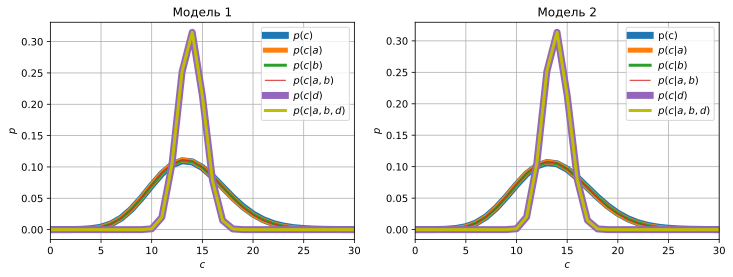

In [8]:
model = 1

model_1 = {key: round(value) for key, value in model_1.items()}

c_prob, c_val = code.pc(params, model)
c_a_prob, c_a_val = code.pc_a([model_1['Ea']], params, model)
c_b_prob, c_b_val = code.pc_b([model_1['Eb']], params, model)
c_d_prob, c_d_val = code.pc_d([model_1['Ed']], params, model)
c_ab_prob, c_ab_val = code.pc_ab([model_1['Ea']], [model_1['Eb']], params, model)
c_abd_prob, c_abd_val = code.pc_abd([model_1['Ea']], [model_1['Eb']], [model_1['Ed']], params, model)

model_1_new = {'Ec': np.sum(c_val * c_prob), 
               'Ec_a': np.sum(c_a_val * np.squeeze(c_a_prob)),
               'Ec_b': np.sum(c_b_val * np.squeeze(c_b_prob)),
               'Ec_d': np.sum(c_d_val * np.squeeze(c_d_prob)), 
               'Ec_ab': np.sum(c_ab_val * np.squeeze(c_ab_prob)), 
               'Ec_abd': np.sum(c_abd_val * np.squeeze(c_abd_prob))}
model_1_new['Dc'] = np.sum(c_prob * (c_val - model_1_new['Ec']) ** 2)
model_1_new['Dc_a'] = np.sum(np.squeeze(c_a_prob) * (c_a_val - model_1_new['Ec_a']) ** 2)
model_1_new['Dc_b'] = np.sum(np.squeeze(c_b_prob) * (c_b_val - model_1_new['Ec_b']) ** 2)
model_1_new['Dc_d'] = np.sum(np.squeeze(c_d_prob) * (c_d_val - model_1_new['Ec_d']) ** 2)
model_1_new['Dc_ab'] = np.sum(np.squeeze(c_ab_prob) * (c_ab_val - model_1_new['Ec_ab']) ** 2)
model_1_new['Dc_abd'] = np.sum(np.squeeze(c_abd_prob) * (c_abd_val - model_1_new['Ec_abd']) ** 2)

plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
plt.title('Модель 1')

plt.plot(c_val, c_prob, label='$p(c)$', linewidth = 7)
plt.plot(c_a_val, np.squeeze(c_a_prob), label='$p(c|a)$', linewidth=5)
plt.plot(c_b_val, np.squeeze(c_b_prob), label='$p(c|b)$', linewidth=3)
plt.plot(c_ab_val, np.squeeze(c_ab_prob), label='$p(c|a,b)$', linewidth=1)
plt.plot(c_d_val, np.squeeze(c_d_prob), label='$p(c|d)$', linewidth=7)
plt.plot(c_abd_val, np.squeeze(c_abd_prob), label='$p(c|a,b,d)$', linewidth=3, color='y')

plt.grid(True)
plt.legend()
plt.xlim(0,30)

plt.xlabel('$c$')
plt.ylabel('$p$')

model = 2

model_2 = {key: round(value) for key, value in model_2.items()}

c_prob, c_val = code.pc(params, model)
c_a_prob, c_a_val = code.pc_a(np.array([model_2['Ea']]), params, model)
c_b_prob, c_b_val = code.pc_b(np.array([model_2['Eb']]), params, model)
c_d_prob, c_d_val = code.pc_d(np.array([model_2['Ed']]), params, model)
c_ab_prob, c_ab_val = code.pc_ab(np.array([model_2['Ea']]), np.array([model_2['Eb']]), params, model)
c_abd_prob, c_abd_val = code.pc_abd(np.array([model_2['Ea']]), np.array([model_2['Eb']]), 
                                    np.array([model_2['Ed']]), params, model)

model_2_new = {'Ec': np.sum(c_val * c_prob), 
               'Ec_a': np.sum(c_a_val * np.squeeze(c_a_prob)),
               'Ec_b': np.sum(c_b_val * np.squeeze(c_b_prob)),
               'Ec_d': np.sum(c_d_val * np.squeeze(c_d_prob)), 
               'Ec_ab': np.sum(c_ab_val * np.squeeze(c_ab_prob)), 
               'Ec_abd': np.sum(c_abd_val * np.squeeze(c_abd_prob))}
model_2_new['Dc'] = np.sum(c_prob * (c_val - model_2_new['Ec']) ** 2)
model_2_new['Dc_a'] = np.sum(np.squeeze(c_a_prob) * (c_a_val - model_2_new['Ec_a']) ** 2)
model_2_new['Dc_b'] = np.sum(np.squeeze(c_b_prob) * (c_b_val - model_2_new['Ec_b']) ** 2)
model_2_new['Dc_d'] = np.sum(np.squeeze(c_d_prob) * (c_d_val - model_2_new['Ec_d']) ** 2)
model_2_new['Dc_ab'] = np.sum(np.squeeze(c_ab_prob) * (c_ab_val - model_2_new['Ec_ab']) ** 2)
model_2_new['Dc_abd'] = np.sum(np.squeeze(c_abd_prob) * (c_abd_val - model_2_new['Ec_abd']) ** 2)

plt.subplot(1,2,2)
plt.title('Модель 2')

plt.plot(c_val, c_prob, label='p(c)', linewidth = 7)
plt.plot(c_a_val, np.squeeze(c_a_prob), label='$p(c|a)$', linewidth=5)
plt.plot(c_b_val, np.squeeze(c_b_prob), label='$p(c|b)$', linewidth=3)
plt.plot(c_ab_val, np.squeeze(c_ab_prob), label='$p(c|a,b)$', linewidth=1)
plt.plot(c_d_val, np.squeeze(c_d_prob), label='$p(c|d)$', linewidth=7)
plt.plot(c_abd_val, np.squeeze(c_abd_prob), label='$p(c|a,b,d)$', linewidth=3, color='y')

plt.grid(True)
plt.legend()
plt.xlim(0,30)

plt.xlabel('$c$')
plt.ylabel('$p$')

plt.savefig('functions.pdf', bbox_inches='tight')
plt.show()

In [9]:
models_dct_new = [model_1_new, model_2_new]

In [10]:
for i in range(1,3):
    print('Model ' + str(i) + ':')
    for key, value in models_dct_new[i-1].items():
        print('\t' + key + ' = ' + str(round(value, 6)))

Model 1:
	Ec = 13.75
	Ec_a = 13.7
	Ec_b = 13.75
	Ec_d = 13.895971
	Ec_ab = 13.7
	Ec_abd = 13.890873
	Dc = 13.1675
	Dc_a = 12.91
	Dc_b = 13.0825
	Dc_d = 1.533582
	Dc_ab = 12.825
	Dc_abd = 1.529425
Model 2:
	Ec = 13.75
	Ec_a = 13.7
	Ec_b = 13.75
	Ec_d = 13.893834
	Ec_ab = 13.7
	Ec_abd = 13.888971
	Dc = 14.0475
	Dc_a = 13.785
	Dc_b = 13.9625
	Dc_d = 1.543943
	Dc_ab = 13.7
	Dc_abd = 1.540229


# 4

In [11]:
d = np.arange(0, 2 * (amax + bmax) + 1)

model = 1

c_d_prob, c_d_val = code.pc_d(d, params, model)
Ec_d = c_d_val @ c_d_prob
Ec_d_2 = c_d_val**2 @ c_d_prob
Dc_d = Ec_d_2 - (Ec_d) ** 2

c_a_prob, c_a_val = code.pc_a(np.arange(amin, amax + 1), params, model)
Ec_a = c_a_val @ c_a_prob
Ec_a_2 = c_a_val**2 @ c_a_prob
Dc_a = Ec_a_2 - (Ec_a) ** 2

c_b_prob, c_b_val = code.pc_b(np.arange(bmin, bmax + 1), params, model)
Ec_b = c_b_val @ c_b_prob
Ec_b_2 = c_b_val**2 @ c_b_prob
Dc_b = Ec_b_2 - (Ec_b) ** 2

print('Model 1:')
print('\tmax(D(c|d) = ', np.nanmax(Dc_d))
print('\tmin(D(c|a) = ', np.nanmin(Dc_a))
print('\tmin(D(c|b) = ', np.nanmin(Dc_b))

model = 2

c_d_prob, c_d_val = code.pc_d(d, params, model)
Ec_d = c_d_val @ c_d_prob
Ec_d_2 = c_d_val**2 @ c_d_prob
Dc_d = Ec_d_2 - (Ec_d) ** 2

c_a_prob, c_a_val = code.pc_a(np.arange(amin, amax + 1), params, model)
Ec_a = c_a_val @ c_a_prob
Ec_a_2 = c_a_val**2 @ c_a_prob
Dc_a = Ec_a_2 - (Ec_a) ** 2

c_b_prob, c_b_val = code.pc_b(np.arange(bmin, bmax + 1), params, model)
Ec_b = c_b_val @ c_b_prob
Ec_b_2 = c_b_val**2 @ c_b_prob
Dc_b = Ec_b_2 - (Ec_b) ** 2

print('Model 2:')
print('\tmax(D(c|d) = ', np.nanmax(Dc_d))
print('\tmin(D(c|a) = ', np.nanmin(Dc_a))
print('\tmin(D(c|b) = ', np.nanmin(Dc_b))

Model 1:
	max(D(c|d) =  10.298690905139665
	min(D(c|a) =  12.280000000001507
	min(D(c|b) =  12.587500000006997
Model 2:
	max(D(c|d) =  17.00980777356017
	min(D(c|a) =  13.084999999999809
	min(D(c|b) =  13.462500000000148


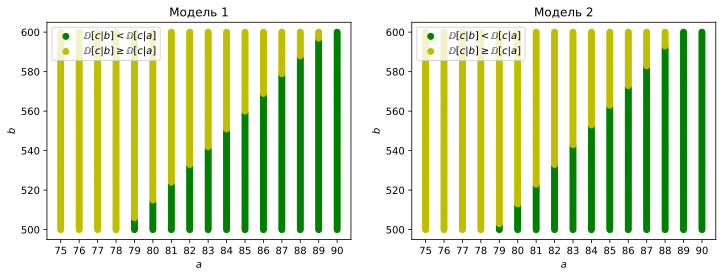

In [15]:
model = 1

c_a_prob, c_a_val = code.pc_a(np.arange(amin, amax + 1), params, model)
Ec_a = c_a_val @ c_a_prob
Ec_a_2 = c_a_val**2 @ c_a_prob
Dc_a = Ec_a_2 - (Ec_a) ** 2

c_b_prob, c_b_val = code.pc_b(np.arange(bmin, bmax + 1), params, model)
Ec_b = c_b_val @ c_b_prob
Ec_b_2 = c_b_val**2 @ c_b_prob
Dc_b = Ec_b_2 - (Ec_b) ** 2

m_1 = (Dc_b < Dc_a[:, np.newaxis]).astype(int)

plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
plt.title('Модель 1')

plt.scatter(*np.where(m_1 == 1), label='$\mathbb{D}[c|b] < \mathbb{D}[c|a]$', color='g')
plt.scatter(*np.where(m_1 == 0), label='$\mathbb{D}[c|b]\geq\mathbb{D}[c|a]$', color='y')

plt.xlabel('$a$')
plt.ylabel('$b$')

plt.xticks(np.arange(amax - amin + 1), np.arange(amin, amax + 1))
plt.yticks(np.arange(bmax - bmin + 1, step=20), np.arange(bmin, bmax + 1, step=20))

plt.legend(loc='upper left')

model = 2

c_a_prob, c_a_val = code.pc_a(np.arange(amin, amax + 1), params, model)
Ec_a = c_a_val @ c_a_prob
Ec_a_2 = c_a_val**2 @ c_a_prob
Dc_a = Ec_a_2 - (Ec_a) ** 2

c_b_prob, c_b_val = code.pc_b(np.arange(bmin, bmax + 1), params, model)
Ec_b = c_b_val @ c_b_prob
Ec_b_2 = c_b_val**2 @ c_b_prob
Dc_b = Ec_b_2 - (Ec_b) ** 2

m_2 = (Dc_b < Dc_a[:, np.newaxis]).astype(int)

plt.subplot(1,2,2)
plt.title('Модель 2')

plt.scatter(*np.where(m_2 == 1), label='$\mathbb{D}[c|b] < \mathbb{D}[c|a]$', color='g')
plt.scatter(*np.where(m_2 == 0), label='$\mathbb{D}[c|b]\geq\mathbb{D}[c|a]$', color='y')

plt.xlabel('$a$')
plt.ylabel('$b$')

plt.xticks(np.arange(amax - amin + 1), np.arange(amin, amax + 1))
plt.yticks(np.arange(bmax - bmin + 1, step=20), np.arange(bmin, bmax + 1, step=20))

plt.legend(loc='upper left')
plt.savefig('variances.pdf', bbox_inches='tight')
plt.show()

In [19]:
m_1.sum(axis=1)

array([  0,   0,   0,   0,   6,  15,  24,  33,  42,  51,  60,  69,  79,
        88,  97, 101])

In [17]:
m_2.sum(axis=1)

array([  0,   0,   0,   0,   3,  13,  23,  33,  43,  53,  63,  73,  83,
        93, 101, 101])

# 5

In [452]:
model_1 = {key: round(value) for key, value in model_1.items()}
model_2 = {key: round(value) for key, value in model_2.items()}

models_dct = [model_1, model_2]

In [488]:
x = %timeit -o code.pc(params, model=1)
y = %timeit -o code.pc(params, model=2)

x.average, y.average

71.4 ms ± 236 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
67.7 ms ± 298 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


(0.0713945879428398, 0.06767044211425985)

In [491]:
x = %timeit -o code.pc_ab(np.array([models_dct[model-1]['Ea']]), np.array([models_dct[model-1]['Eb']]), params, model=1)
y = %timeit -o code.pc_ab(np.array([models_dct[model-1]['Ea']]), np.array([models_dct[model-1]['Eb']]), params, model=2)

x.average, y.average

360 µs ± 4.43 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
143 µs ± 5.89 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


(0.0003598526430016916, 0.0001434239458571288)

In [492]:
x = %timeit -o code.pc_a(np.array([models_dct[model-1]['Ea']]), params, model=1)
y = %timeit -o code.pc_a(np.array([models_dct[model-1]['Ea']]), params, model=2)

x.average, y.average

9.97 ms ± 455 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
3.65 ms ± 43.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


(0.00996553590997272, 0.00365275629430211)

In [495]:
x = %timeit -o code.pc_b(np.array([models_dct[model-1]['Eb']]), params, model=1)
y = %timeit -o code.pc_b(np.array([models_dct[model-1]['Eb']]), params, model=2)

x.average, y.average

1.14 ms ± 15.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
747 µs ± 5.36 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


(0.0011392358557121562, 0.0007467502160039398)

In [498]:
x = %timeit -o code.pc_d(np.array([models_dct[model-1]['Ed']]), params, model=1)
y = %timeit -o code.pc_d(np.array([models_dct[model-1]['Ed']]), params, model=2)

x.average, y.average

264 ms ± 16.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
245 ms ± 2.13 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


(0.26448463143190437, 0.24501679014065303)

In [500]:
x = %timeit -o code.pc_abd(np.array([models_dct[model-1]['Ea']]), np.array([models_dct[model-1]['Eb']]), np.array([models_dct[model-1]['Ed']]), params, model=1)
y = %timeit -o code.pc_abd(np.array([models_dct[model-1]['Ea']]), np.array([models_dct[model-1]['Eb']]), np.array([models_dct[model-1]['Ed']]), params, model=2)

x.average, y.average

46.1 ms ± 1.81 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
43.7 ms ± 1.65 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


(0.04609616849962289, 0.04365015078572988)

In [502]:
x = %timeit -o code.pd(params, model=1)
y = %timeit -o code.pd(params, model=2)

x.average, y.average

144 ms ± 6.78 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
135 ms ± 423 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


(0.1436056961858412, 0.13520548180011766)